In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('LoanDataset.csv')
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome'>

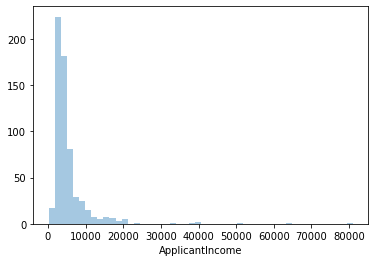

In [6]:
sns.distplot(loan_dataset.ApplicantIncome,kde=False)

In [7]:
#The distribution is skewed and we can notice quite a few outliers
loan_dataset.Gender = loan_dataset.Gender.fillna('Male')
loan_dataset.Married = loan_dataset.Married.fillna('Yes')
loan_dataset.Dependents = loan_dataset.Dependents.fillna('0')
loan_dataset.Self_Employed = loan_dataset.Self_Employed.fillna('No')
loan_dataset.LoanAmount = loan_dataset.LoanAmount.fillna(loan_dataset.LoanAmount.mean())
loan_dataset.Loan_Amount_Term = loan_dataset.Loan_Amount_Term.fillna(360.0)
loan_dataset.Credit_History = loan_dataset.Credit_History.fillna(1.0)

In [8]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:xlabel='ApplicantIncome'>

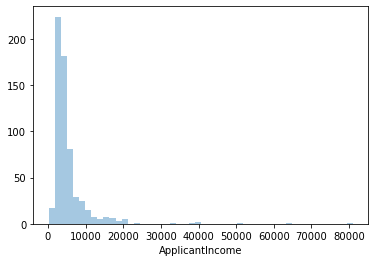

In [9]:
sns.distplot(loan_dataset.ApplicantIncome,kde=False)

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

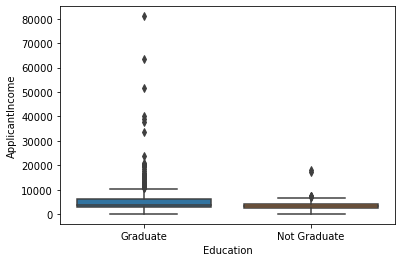

In [10]:
sns.boxplot(x='Education',y='ApplicantIncome',data=loan_dataset)

In [11]:
print(loan_dataset.groupby('Credit_History').mean()['LoanAmount'])
print(loan_dataset.groupby('Credit_History').std()['LoanAmount'])
print(loan_dataset.groupby('Loan_Amount_Term').std()['LoanAmount'])
print(loan_dataset.groupby('Married').mean()['LoanAmount'])
print(loan_dataset.groupby('Married').std()['LoanAmount'])
print(loan_dataset.groupby('Dependents').mean()['LoanAmount'])
print(loan_dataset.groupby('Dependents').std()['LoanAmount'])
print(loan_dataset.groupby('Education').mean()['LoanAmount'])
print(loan_dataset.groupby('Education').std()['LoanAmount'])
print(loan_dataset.groupby('Self_Employed').mean()['LoanAmount'])
print(loan_dataset.groupby('Self_Employed').std()['LoanAmount'])
print(loan_dataset.groupby('ApplicantIncome').mean()['LoanAmount'])
print(loan_dataset.groupby('ApplicantIncome').std()['LoanAmount'])
print(loan_dataset.groupby('Property_Area').mean()['LoanAmount'])
print(loan_dataset.groupby('Property_Area').std()['LoanAmount'])
print(loan_dataset.groupby('Loan_Status').mean())


Credit_History
0.0    146.703917
1.0    146.362703
Name: LoanAmount, dtype: float64
Credit_History
0.0    83.206724
1.0    84.256096
Name: LoanAmount, dtype: float64
Loan_Amount_Term
12.0            NaN
36.0      53.033009
60.0      21.213203
84.0      31.878676
120.0      4.618802
180.0    106.208531
240.0     66.100888
300.0    178.116931
360.0     76.734080
480.0    141.657636
Name: LoanAmount, dtype: float64
Married
No     129.459555
Yes    155.416914
Name: LoanAmount, dtype: float64
Married
No     73.214640
Yes    88.020687
Name: LoanAmount, dtype: float64
Dependents
0     135.995439
1     158.143614
2     150.111252
3+    189.153418
Name: LoanAmount, dtype: float64
Dependents
0      73.391771
1      93.225693
2      70.208644
3+    132.447518
Name: LoanAmount, dtype: float64
Education
Graduate        153.821213
Not Graduate    119.872277
Name: LoanAmount, dtype: float64
Education
Graduate        91.427171
Not Graduate    39.214758
Name: LoanAmount, dtype: float64
Self_Employed
No

In [12]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [13]:
loan_dataset.groupby('Credit_History').mean()['Loan_Status']

Credit_History
0.0    0.078652
1.0    0.790476
Name: Loan_Status, dtype: float64

In [14]:
print(loan_dataset.groupby('Gender').mean()['Loan_Status'])
print(loan_dataset.groupby('Married').mean()['Loan_Status'])
print(loan_dataset.groupby('Dependents').mean()['Loan_Status'])
print(loan_dataset.groupby('Education').mean()['Loan_Status'])
print(loan_dataset.groupby('Self_Employed').mean()['Loan_Status'])
print(loan_dataset.groupby('Property_Area').mean()['Loan_Status'])

Gender
Female    0.669643
Male      0.691235
Name: Loan_Status, dtype: float64
Married
No     0.629108
Yes    0.718204
Name: Loan_Status, dtype: float64
Dependents
0     0.686111
1     0.647059
2     0.752475
3+    0.647059
Name: Loan_Status, dtype: float64
Education
Graduate        0.708333
Not Graduate    0.611940
Name: Loan_Status, dtype: float64
Self_Employed
No     0.687970
Yes    0.682927
Name: Loan_Status, dtype: float64
Property_Area
Rural        0.614525
Semiurban    0.768240
Urban        0.658416
Name: Loan_Status, dtype: float64


In [15]:
loan_dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

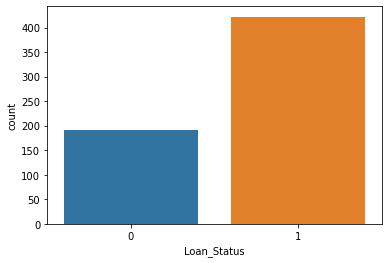

In [16]:
sns.countplot('Loan_Status', data=loan_dataset)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

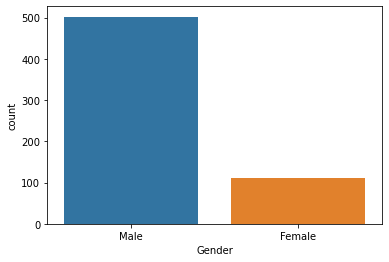

In [17]:
sns.countplot('Gender', data=loan_dataset)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

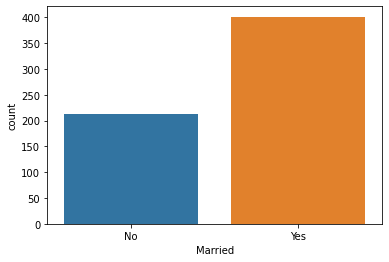

In [18]:
sns.countplot('Married', data=loan_dataset)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

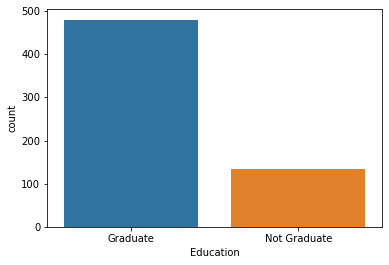

In [19]:
sns.countplot('Education', data=loan_dataset)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

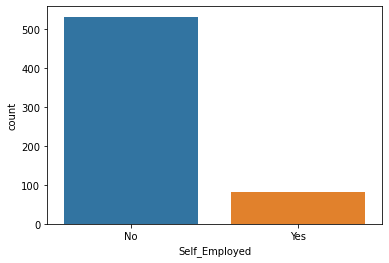

In [20]:
sns.countplot('Self_Employed', data=loan_dataset)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

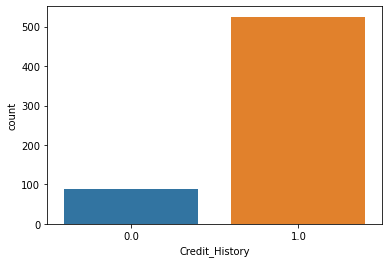

In [21]:
sns.countplot('Credit_History', data=loan_dataset)

In [22]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

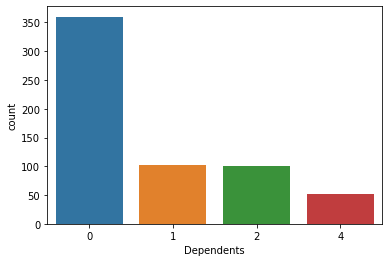

In [23]:
sns.countplot('Dependents', data=loan_dataset)

<AxesSubplot:xlabel='Education', ylabel='count'>

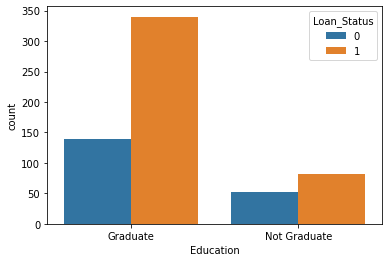

In [24]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

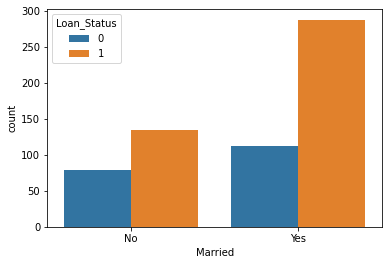

In [25]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [26]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [27]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [28]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          1              0             5849   
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [29]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

# SVM

In [30]:
classifier = svm.SVC(kernel='linear')

In [31]:
#training the support Vector Macine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [32]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [33]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8134057971014492


In [34]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [35]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8064516129032258


In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(Y_test, X_test_prediction)

array([[ 9, 10],
       [ 2, 41]], dtype=int64)

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.82      0.47      0.60        19
           1       0.80      0.95      0.87        43

    accuracy                           0.81        62
   macro avg       0.81      0.71      0.74        62
weighted avg       0.81      0.81      0.79        62



# Logistic Regression

In [41]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 3)
classifier.fit(X_train, Y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=3)

In [42]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)

In [43]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(Y_pred, Y_test))

The accuracy of Logistic Regression is:  0.7903225806451613


In [44]:
confusion_matrix(Y_test, Y_pred)

array([[ 9, 10],
       [ 3, 40]], dtype=int64)

In [45]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.47      0.58        19
           1       0.80      0.93      0.86        43

    accuracy                           0.79        62
   macro avg       0.78      0.70      0.72        62
weighted avg       0.78      0.79      0.77        62



# Decision Tree

In [46]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [47]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)

In [48]:
# Measuring Accuracy
print('The accuracy of Decision Tree Classifier is: ', metrics.accuracy_score(Y_pred, Y_test))

The accuracy of Decision Tree Classifier is:  0.7419354838709677


In [49]:
confusion_matrix(Y_test, Y_pred)

array([[11,  8],
       [ 8, 35]], dtype=int64)

In [50]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58        19
           1       0.81      0.81      0.81        43

    accuracy                           0.74        62
   macro avg       0.70      0.70      0.70        62
weighted avg       0.74      0.74      0.74        62



In [51]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [52]:
chi2_features = SelectKBest(chi2, k=3)
X_kbest_features = chi2_features.fit_transform(X_train, Y_train)

In [56]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_kbest_features, Y_train)
# Predicting the Test set results
Y_pred = classifier.predict(X_test)
# Measuring Accuracy
print('The accuracy of Decision Tree Classifier is: ', metrics.accuracy_score(Y_pred, Y_test))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 11 features, but DecisionTreeClassifier is expecting 3 features as input.

In [54]:
confusion_matrix(Y_test, Y_pred)

array([[11,  8],
       [ 8, 35]], dtype=int64)

In [55]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58        19
           1       0.81      0.81      0.81        43

    accuracy                           0.74        62
   macro avg       0.70      0.70      0.70        62
weighted avg       0.74      0.74      0.74        62

